In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure
plt.style.use('ggplot')

from pandas import Series
from numpy.random import randn

# NFL Week 11 - Data Clean and Analysis

## Importing the Data

Data from stathead.com

In [2]:
data = pd.read_csv('ThruWeek11_TOR.csv')

In [3]:
data.head()

,Tm,G,Plays,ToGo,Yds,1st%,TO%,TD,FG,1stD,Int,Fmb,Sk,Pass,Rush,FG.1,Punt,W-L%,PF,W
0,ATL,11.0,834.0,7.4,4.1,25.20%,1.70%,26.0,18.0,210.0,8.0,6.0,26.0,294.0,369.0,22.0,42.0,0.455,259.0,5.0
1,BUF,10.0,808.0,7.5,5.2,29.00%,2.40%,30.0,21.0,234.0,10.0,9.0,20.0,409.0,260.0,24.0,20.0,0.700,281.0,7.0
2,CAR,11.0,818.0,7.8,3.8,19.10%,1.80%,19.0,19.0,156.0,10.0,5.0,26.0,361.0,277.0,21.0,58.0,0.273,207.0,3.0
3,CHI,11.0,862.0,7.9,4.2,23.20%,1.90%,27.0,19.0,200.0,10.0,6.0,40.0,287.0,410.0,20.0,41.0,0.273,241.0,3.0
4,CIN,10.0,832.0,7.3,4.4,26.80%,1.60%,32.0,14.0,223.0,10.0,3.0,36.0,430.0,249.0,18.0,34.0,0.600,265.0,6.0


In [4]:
#insert all of the column meanings here

## Data Exploration and Cleaning

In [5]:
print(type(data), data.shape, data.columns, data.info(), data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tm      32 non-null     object 
 1   G       32 non-null     float64
 2   Plays   32 non-null     float64
 3   ToGo    32 non-null     float64
 4   Yds     32 non-null     float64
 5   1st%    32 non-null     object 
 6   TO%     32 non-null     object 
 7   TD      32 non-null     float64
 8   FG      32 non-null     float64
 9   1stD    32 non-null     float64
 10  Int     32 non-null     float64
 11  Fmb     32 non-null     float64
 12  Sk      32 non-null     float64
 13  Pass    32 non-null     float64
 14  Rush    32 non-null     float64
 15  FG.1    32 non-null     float64
 16  Punt    32 non-null     float64
 17  W-L%    32 non-null     float64
 18  PF      32 non-null     float64
 19  W       32 non-null     float64
dtypes: float64(17), object(3)
memory usage: 5.3+ KB
<class 'pandas.core.frame.Data

In [6]:
data_clean = data.dropna(how='any',axis=0) #dropping any row with null values

In [7]:
data_clean.head()

,Tm,G,Plays,ToGo,Yds,1st%,TO%,TD,FG,1stD,Int,Fmb,Sk,Pass,Rush,FG.1,Punt,W-L%,PF,W
0,ATL,11.0,834.0,7.4,4.1,25.20%,1.70%,26.0,18.0,210.0,8.0,6.0,26.0,294.0,369.0,22.0,42.0,0.455,259.0,5.0
1,BUF,10.0,808.0,7.5,5.2,29.00%,2.40%,30.0,21.0,234.0,10.0,9.0,20.0,409.0,260.0,24.0,20.0,0.700,281.0,7.0
2,CAR,11.0,818.0,7.8,3.8,19.10%,1.80%,19.0,19.0,156.0,10.0,5.0,26.0,361.0,277.0,21.0,58.0,0.273,207.0,3.0
3,CHI,11.0,862.0,7.9,4.2,23.20%,1.90%,27.0,19.0,200.0,10.0,6.0,40.0,287.0,410.0,20.0,41.0,0.273,241.0,3.0
4,CIN,10.0,832.0,7.3,4.4,26.80%,1.60%,32.0,14.0,223.0,10.0,3.0,36.0,430.0,249.0,18.0,34.0,0.600,265.0,6.0


In [8]:
data_clean['TD_per_Game'] = data_clean['TD']/data_clean['G']
data_clean['FG_per_Game'] = data_clean['FG']/data_clean['G']
data_clean['Plays_per_Game'] = data_clean['Plays']/data_clean['G']
data_clean['Sacks_per_Game'] = data_clean['Sk']/data_clean['G']
data_clean['Int_per_Game'] = data_clean['Int']/data_clean['G']
data_clean['Fumbles_per_Game'] = data_clean['Fmb']/data_clean['G']
data_clean['Pass_per_Game'] = data_clean['Pass']/data_clean['G']
data_clean['Rush_per_Game'] = data_clean['Rush']/data_clean['G']
data_clean['1stD_per_Game'] = data_clean['1stD']/data_clean['G']
data_clean['Points_per_Game'] = data_clean['PF']/data_clean['G']
data_clean['Punts_per_Game'] = data_clean['Punt']/data_clean['G']

/var/folders/gl/7b_d04m14gb0yyn6fjwcx25h0000gn/T/ipykernel_23307/1437467923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['TD_per_Game'] = data_clean['TD']/data_clean['G']
/var/folders/gl/7b_d04m14gb0yyn6fjwcx25h0000gn/T/ipykernel_23307/1437467923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['FG_per_Game'] = data_clean['FG']/data_clean['G']
/var/folders/gl/7b_d04m14gb0yyn6fjwcx25h0000gn/T/ipykernel_23307/1437467923.py:3: SettingWithCopyWarning: 
A value is trying to be set

The reason why I calculated per game was because some teams played 11 games and others played 10. It wouldn't be very useful or fair if I used the totals and percentages because it would skew the data.

In [9]:
data_clean.head()

,Tm,G,Plays,ToGo,Yds,1st%,TO%,TD,FG,1stD,...,FG_per_Game,Plays_per_Game,Sacks_per_Game,Int_per_Game,Fumbles_per_Game,Pass_per_Game,Rush_per_Game,1stD_per_Game,Points_per_Game,Punts_per_Game
0,ATL,11.0,834.0,7.4,4.1,25.20%,1.70%,26.0,18.0,210.0,...,1.636364,75.818182,2.363636,0.727273,0.545455,26.727273,33.545455,19.090909,23.545455,3.818182
1,BUF,10.0,808.0,7.5,5.2,29.00%,2.40%,30.0,21.0,234.0,...,2.100000,80.800000,2.000000,1.000000,0.900000,40.900000,26.000000,23.400000,28.100000,2.000000
2,CAR,11.0,818.0,7.8,3.8,19.10%,1.80%,19.0,19.0,156.0,...,1.727273,74.363636,2.363636,0.909091,0.454545,32.818182,25.181818,14.181818,18.818182,5.272727
3,CHI,11.0,862.0,7.9,4.2,23.20%,1.90%,27.0,19.0,200.0,...,1.727273,78.363636,3.636364,0.909091,0.545455,26.090909,37.272727,18.181818,21.909091,3.727273
4,CIN,10.0,832.0,7.3,4.4,26.80%,1.60%,32.0,14.0,223.0,...,1.400000,83.200000,3.600000,1.000000,0.300000,43.000000,24.900000,22.300000,26.500000,3.400000


In [10]:
data_clean = data_clean.drop(columns=['G', 'TD', 'Plays', "Sk", 'Int', 'Fmb', 'Pass', 'Rush', '1stD', 'Punt', 'FG', 'PF', 'ToGo', 'Yds'])

In [11]:
data_clean.head()

,Tm,1st%,TO%,FG.1,W-L%,W,TD_per_Game,FG_per_Game,Plays_per_Game,Sacks_per_Game,Int_per_Game,Fumbles_per_Game,Pass_per_Game,Rush_per_Game,1stD_per_Game,Points_per_Game,Punts_per_Game
0,ATL,25.20%,1.70%,22.0,0.455,5.0,2.363636,1.636364,75.818182,2.363636,0.727273,0.545455,26.727273,33.545455,19.090909,23.545455,3.818182
1,BUF,29.00%,2.40%,24.0,0.700,7.0,3.000000,2.100000,80.800000,2.000000,1.000000,0.900000,40.900000,26.000000,23.400000,28.100000,2.000000
2,CAR,19.10%,1.80%,21.0,0.273,3.0,1.727273,1.727273,74.363636,2.363636,0.909091,0.454545,32.818182,25.181818,14.181818,18.818182,5.272727
3,CHI,23.20%,1.90%,20.0,0.273,3.0,2.454545,1.727273,78.363636,3.636364,0.909091,0.545455,26.090909,37.272727,18.181818,21.909091,3.727273
4,CIN,26.80%,1.60%,18.0,0.600,6.0,3.200000,1.400000,83.200000,3.600000,1.000000,0.300000,43.000000,24.900000,22.300000,26.500000,3.400000


In [12]:
data_clean['W-L'] = (data_clean['W-L%'] > .501).astype(int)

A .500 season is not considered a winning season.

In [13]:
data_clean.head()

,Tm,1st%,TO%,FG.1,W-L%,W,TD_per_Game,FG_per_Game,Plays_per_Game,Sacks_per_Game,Int_per_Game,Fumbles_per_Game,Pass_per_Game,Rush_per_Game,1stD_per_Game,Points_per_Game,Punts_per_Game,W-L
0,ATL,25.20%,1.70%,22.0,0.455,5.0,2.363636,1.636364,75.818182,2.363636,0.727273,0.545455,26.727273,33.545455,19.090909,23.545455,3.818182,0
1,BUF,29.00%,2.40%,24.0,0.700,7.0,3.000000,2.100000,80.800000,2.000000,1.000000,0.900000,40.900000,26.000000,23.400000,28.100000,2.000000,1
2,CAR,19.10%,1.80%,21.0,0.273,3.0,1.727273,1.727273,74.363636,2.363636,0.909091,0.454545,32.818182,25.181818,14.181818,18.818182,5.272727,0
3,CHI,23.20%,1.90%,20.0,0.273,3.0,2.454545,1.727273,78.363636,3.636364,0.909091,0.545455,26.090909,37.272727,18.181818,21.909091,3.727273,0
4,CIN,26.80%,1.60%,18.0,0.600,6.0,3.200000,1.400000,83.200000,3.600000,1.000000,0.300000,43.000000,24.900000,22.300000,26.500000,3.400000,1


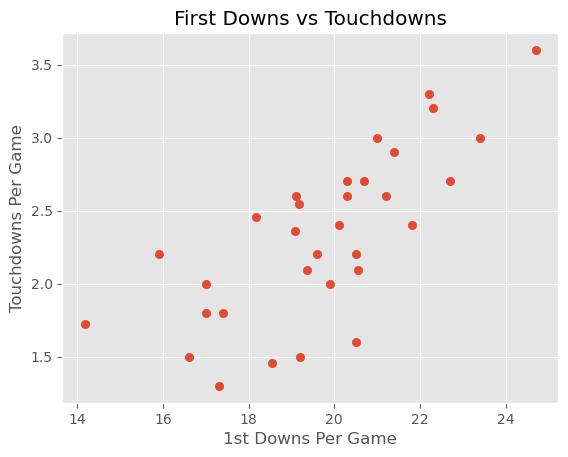

In [14]:
X = data_clean["1stD_per_Game"]
y = data_clean["TD_per_Game"]

plt.scatter(X, y)
plt.title("First Downs vs Touchdowns") #title
plt.xlabel("1st Downs Per Game") #x label
plt.ylabel("Touchdowns Per Game") #y label
plt.show()

Now, after taking averages per game, it looks like there is a correlation between touchdowns per game and 1st downs per game which is expected.

In [15]:
correlation_matrix = data_clean.corr()
correlation_matrix["W-L"]

FG.1               -0.147884
W-L%                0.882935
W                   0.871995
TD_per_Game         0.493321
FG_per_Game        -0.102417
Plays_per_Game     -0.067850
Sacks_per_Game     -0.042339
Int_per_Game       -0.053900
Fumbles_per_Game    0.087636
Pass_per_Game      -0.128136
Rush_per_Game       0.166495
1stD_per_Game       0.280155
Points_per_Game     0.515348
Punts_per_Game     -0.132426
W-L                 1.000000
Name: W-L, dtype: float64

In [16]:
data_clean = data_clean.drop(columns=['FG.1', 'W'])

In [17]:
data_clean.head()

,Tm,1st%,TO%,W-L%,TD_per_Game,FG_per_Game,Plays_per_Game,Sacks_per_Game,Int_per_Game,Fumbles_per_Game,Pass_per_Game,Rush_per_Game,1stD_per_Game,Points_per_Game,Punts_per_Game,W-L
0,ATL,25.20%,1.70%,0.455,2.363636,1.636364,75.818182,2.363636,0.727273,0.545455,26.727273,33.545455,19.090909,23.545455,3.818182,0
1,BUF,29.00%,2.40%,0.700,3.000000,2.100000,80.800000,2.000000,1.000000,0.900000,40.900000,26.000000,23.400000,28.100000,2.000000,1
2,CAR,19.10%,1.80%,0.273,1.727273,1.727273,74.363636,2.363636,0.909091,0.454545,32.818182,25.181818,14.181818,18.818182,5.272727,0
3,CHI,23.20%,1.90%,0.273,2.454545,1.727273,78.363636,3.636364,0.909091,0.545455,26.090909,37.272727,18.181818,21.909091,3.727273,0
4,CIN,26.80%,1.60%,0.600,3.200000,1.400000,83.200000,3.600000,1.000000,0.300000,43.000000,24.900000,22.300000,26.500000,3.400000,1


In [18]:
correlation_matrix = data_clean.corr()
correlation_matrix["W-L"]

W-L%                0.882935
TD_per_Game         0.493321
FG_per_Game        -0.102417
Plays_per_Game     -0.067850
Sacks_per_Game     -0.042339
Int_per_Game       -0.053900
Fumbles_per_Game    0.087636
Pass_per_Game      -0.128136
Rush_per_Game       0.166495
1stD_per_Game       0.280155
Points_per_Game     0.515348
Punts_per_Game     -0.132426
W-L                 1.000000
Name: W-L, dtype: float64

The three most important aspects (after the Win-Loss percentage) to a winning season according to this correlation matrix is touchdowns per game, points scored per game, and first downs per game.

It makes sense that sacks, punts, and interceptions negatively effect a teams ability to having a winning season. I did find it interesting that field goals per game have no impact on having a winning season.

## Linear Regression from Scratch

In [19]:
# Calculate the mean of X and y
xmean = np.mean(X)
ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of beta
data_clean['xycov'] = (data_clean['1stD_per_Game'] - xmean) * (data_clean['TD_per_Game'] - ymean)
data_clean['xvar'] = (data_clean['1stD_per_Game'] - xmean)**2

# Calculate beta and alpha
beta = data_clean['xycov'].sum() / data_clean['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = -1.3817095550572085
beta = 0.1881210052108736


In [20]:
ypred = alpha + beta * X

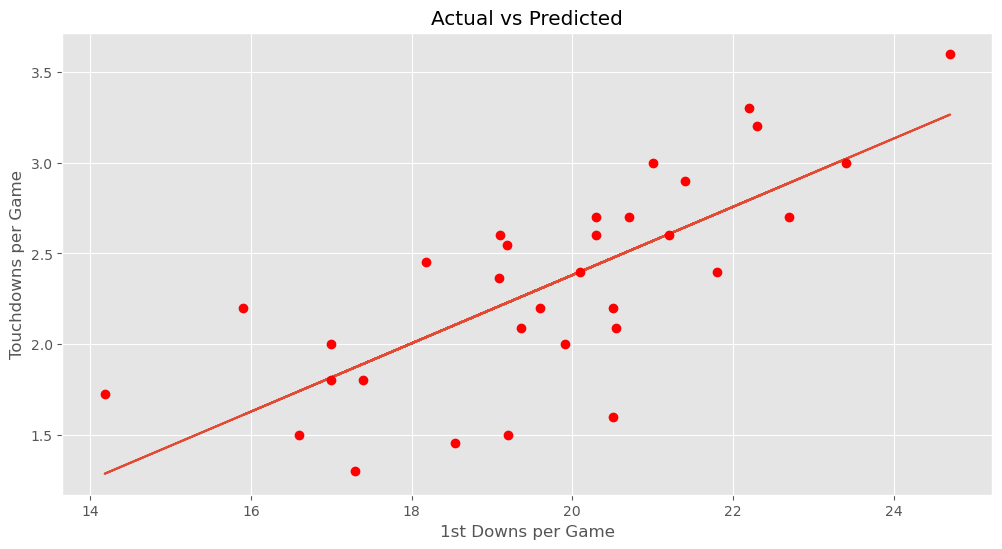

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # regression line
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('1st Downs per Game')
plt.ylabel('Touchdowns per Game')

plt.show()

## Multiple Regression using Scikit Learn

In [22]:
# Build linear regression model using 1st Downs, Touchdowns, and Points per game as predictors
# Split data into predictors X and output Y
predictors = ['1stD_per_Game', 'TD_per_Game', 'Points_per_Game']
X = data_clean[predictors]
y = data_clean['W-L%']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [23]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = -0.07908654682750171
betas = [-0.00239912  0.09194775  0.01898571]


In [24]:
model.predict(X)

array([0.53947028, 0.67411574, 0.40298495, 0.51894266, 0.66476718,
       0.57036939, 0.3087563 , 0.4781105 , 0.59069572, 0.27803069,
       0.62101792, 0.41535882, 0.32088247, 0.49937857, 0.76223838,
       0.61466064, 0.54388901, 0.53871022, 0.45002998, 0.46322359,
       0.44183954, 0.45147669, 0.67040473, 0.33552904, 0.50335422,
       0.36363464, 0.59035619, 0.52434135, 0.60840298, 0.55933822,
       0.36628638, 0.42640301])

In [25]:
new_X = [[20, 2, 17]]
print(model.predict(new_X))

[0.37958362]


/Users/lauren/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


It is predicted that if a team had 20 1st downs per game, 2 touchdowns per game, and 17 points per game they would have a record of 0.380 according to the model.